          Total number of missing  Percentage of missing valiues
age                             0                            0.0
sex                             0                            0.0
cp                              0                            0.0
trtbps                          0                            0.0
chol                            0                            0.0
fbs                             0                            0.0
restecg                         0                            0.0
thalachh                        0                            0.0
exng                            0                            0.0
oldpeak                         0                            0.0
slp                             0                            0.0
caa                             0                            0.0
thall                           0                            0.0
output                          0                            0.0


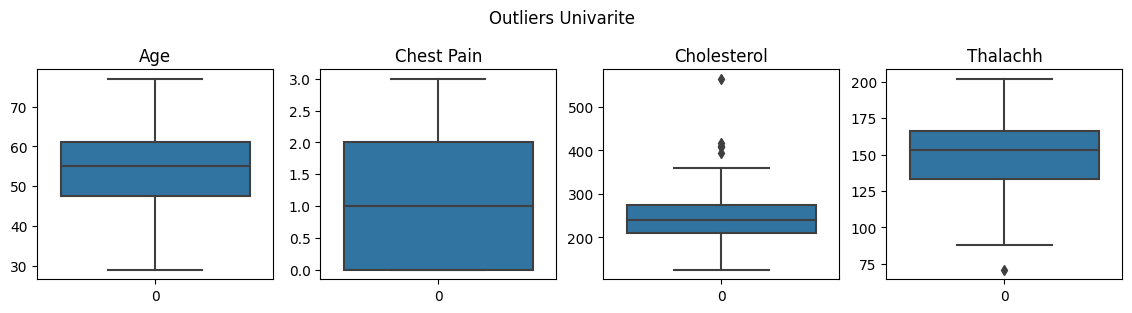

Gaussian Naive Bayes model accuracy(in %): 83.60655737704919


In [1]:
import pandas as pd

data = pd.read_csv("heart2.csv")

x = data.isnull().sum()
y = (data.isnull().sum()/data.shape[0])*100
z = {'Total number of missing':x,'Percentage of missing valiues':y}
df = pd.DataFrame(z,columns=['Total number of missing','Percentage of missing valiues'])
df.sort_values(by='Percentage of missing valiues',ascending=False)
print(df)

#checking if there is any outliers in dataset or not.

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14,6)

plt.subplot(2,4,1)
sns.boxplot(data['age'])
plt.title('Age')

plt.subplot(2,4,2)
sns.boxplot(data['cp'])
plt.title('Chest Pain')

plt.subplot(2,4,3)
sns.boxplot(data['chol'])
plt.title('Cholesterol')

plt.subplot(2,4,4)
sns.boxplot(data['thalachh'])
plt.title('Thalachh')

plt.suptitle("Outliers Univarite")
plt.show()

#divided Dataset in x(train & test) and y(train & test)

x = data.iloc[:,:-1] #taking all values excepted last col or target value
y = data.iloc[:,-1] # taking target values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)

# using GaussianNB model to predict the model accuracy

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)



